# **Ecommerce Spending and Visa Spending Momentum Index (SMI) Analysis**

## **Project Objective**
The objective of this project is to analyze consumer spending patterns by integrating ecommerce transactional data with the Visa Spending Momentum Index (SMI). The analysis leverages unsupervised machine learning techniques, such as clustering, to uncover trends and insights about discretionary and non-discretionary spending.

## **Data Overview**
1. **Ecommerce Data**:
   - Contains transactional information, including product categories, purchase amounts, and customer demographics.
   - Categories include:
     - **Discretionary Spending**: Electronics, Clothing.
     - **Non-Discretionary Spending**: Books, Home essentials.
   - Aggregated monthly to align with SMI metrics.

2. **Visa Spending Momentum Index (SMI)**:
   - Provides a macroeconomic perspective on consumer spending momentum.
   - Values >100 indicate strengthening consumer spending momentum, while values <100 suggest weakening momentum.
   - Includes metrics for both discretionary and non-discretionary spending, presented in seasonally adjusted and non-seasonally adjusted formats.

## **Goals**
- Combine both datasets by aligning them on a monthly `Period`.
- Categorize and compare ecommerce spending with SMI trends.
- Identify patterns and clusters in spending behaviors using unsupervised learning models.
- Highlight actionable insights for businesses to adapt their strategies.

---

The following cells load and preview the datasets to ensure proper formatting and compatibility for analysis.

In [ ]:
import pandas as pd

# File paths
smi_file_path = '/Users/awesomesauce/Desktop/SpendingDataML/filtered_smi_data.csv'
ecommerce_file_path = '/Users/awesomesauce/Desktop/SpendingDataML/ecommerce_customer_data_large.csv'

# Load the datasets
smi_data = pd.read_csv(smi_file_path, skiprows=1)
ecommerce_data = pd.read_csv(ecommerce_file_path)

# Preview the first few rows of the SMI data
print("SMI Data Preview:")
print(smi_data.head())
print("\nSMI Data Info:")
print(smi_data.info())

# Preview the first few rows of the eCommerce data
print("\nEcommerce Data Preview:")
print(ecommerce_data.head())
print("\nEcommerce Data Info:")
print(ecommerce_data.info())

In [ ]:
smi_data.columns = [
    'Date', 
    'SMI_Headline_Seasonally', 
    'SMI_Headline_NonSeasonally', 
    'Discretionary_Date', 
    'SMI_Discretionary_Seasonally', 
    'SMI_Discretionary_NonSeasonally', 
    'Non_Discretionary_Date', 
    'SMI_Non_Discretionary_Seasonally', 
    'SMI_Non_Discretionary_NonSeasonally'
]

# Preview the data

print(smi_data.head())


In [111]:
smi_data = smi_data.drop(columns=['Discretionary_Date', 'Non_Discretionary_Date'])

In [113]:
smi_data = smi_data[['Date', 'SMI_Discretionary_Seasonally', 'SMI_Non_Discretionary_Seasonally']]

In [115]:
smi_data = smi_data.rename(columns={
    'SMI_Discretionary_Seasonally': 'SMI_Discretionary',
    'SMI_Non_Discretionary_Seasonally': 'SMI_Non_Discretionary'
})

## **Data Preparation and Aggregation**

### **Overview**
This section prepares and transforms the data from both the Visa Spending Momentum Index (SMI) and the Ecommerce datasets for analysis. The following steps are performed:

1. **SMI Data Preparation**:
   - Converts the `Date` column to a datetime format.
   - Filters the data to include only necessary columns: `Date`, `SMI_Discretionary`, and `SMI_Non_Discretionary`.
   - Creates a `Period` column for monthly aggregation.

2. **Ecommerce Data Preparation**:
   - Converts the `Purchase Date` column to datetime format.
   - Extracts the month and year to create a `Period` column.
   - Categorizes spending into discretionary, non-discretionary, or other categories.

3. **Data Aggregation**:
   - Aggregates total spending in the ecommerce data by `Period` and `Spending Type`.
   - Merges the aggregated ecommerce data with SMI data on the common `Period`.

4. **Validation**:
   - Previews the transformed and merged datasets.
   - Inspects the structure of the merged data to ensure readiness for analysis.

In [ ]:
# Ensure Date in SMI data is in datetime format
smi_data['Date'] = pd.to_datetime(smi_data['Date'], errors='coerce')  # Convert dates, handle invalid values as NaT

# Drop rows with invalid dates
smi_data = smi_data.dropna(subset=['Date'])  # Retain only rows with valid dates

# Create a Period column for monthly aggregation
smi_data['Period'] = smi_data['Date'].dt.to_period('M')  # Extract year and month as a Period

# Preview the SMI data after transformation
print("Transformed SMI Data:")
print(smi_data.head())

# Convert Purchase Date in ecommerce data to datetime format
ecommerce_data['Purchase Date'] = pd.to_datetime(ecommerce_data['Purchase Date'])

# Extract the time period for aggregation (monthly)
ecommerce_data['Period'] = ecommerce_data['Purchase Date'].dt.to_period('M')  # Extract year and month

# Categorize spending as Discretionary or Non-Discretionary
def categorize_product(category):
    if category in ['Clothing', 'Electronics']:
        return 'Discretionary'
    elif category in ['Books', 'Home']:
        return 'Non-Discretionary'
    else:
        return 'Other'  # Fallback for ambiguous categories

ecommerce_data['Spending Type'] = ecommerce_data['Product Category'].apply(categorize_product)

# Aggregate total spending by Period and Spending Type
aggregated_data = ecommerce_data.groupby(['Period', 'Spending Type'])['Total Purchase Amount'].sum().unstack()
aggregated_data = aggregated_data.reset_index()  # Reset index for better readability

# Preview aggregated ecommerce data
print("Aggregated Ecommerce Data:")
print(aggregated_data.head())

# Merge the SMI data with aggregated ecommerce data on Period
merged_data = pd.merge(aggregated_data, smi_data, on='Period', how='inner')

# Preview the merged dataset
print("Merged Data:")
print(merged_data.head())

# Analyze the structure of the merged dataset
print("Merged Data Info:")
print(merged_data.info())

In [ ]:
# Convert SMI Date to the same time period format
smi_data['Period'] = smi_data['Date'].dt.to_period('M')

# Merge datasets on Period
merged_data = pd.merge(aggregated_data, smi_data, on='Period', how='inner')

# Preview the merged dataset
print(merged_data.head())

In [ ]:
print(smi_data.dtypes)
print(smi_data['Date'].head())

In [123]:
smi_data['Date'] = pd.to_datetime(smi_data['Date'], errors='coerce')  # Handle invalid formats gracefully

In [125]:
smi_data = smi_data.dropna(subset=['Date'])

In [127]:
smi_data['Period'] = smi_data['Date'].dt.to_period('M')


## **Dataset Merging and Preview**

### **Overview**
In this step, we merge the aggregated ecommerce data with the SMI data based on the common `Period` column. This alignment enables us to analyze spending trends side-by-side with the Visa Spending Momentum Index metrics.

### **Steps**
1. **Preview SMI Data**:
   - Verifies the structure of the transformed SMI data, ensuring the required columns (`Date`, `SMI_Discretionary`, `SMI_Non_Discretionary`, `Period`) are present and correctly formatted.

2. **Merge Datasets**:
   - Combines the ecommerce and SMI datasets on the `Period` column using an inner join.
   - This ensures that only periods with data in both datasets are included.

3. **Preview Merged Data**:
   - Displays the first few rows of the merged dataset to confirm successful integration of ecommerce and SMI data.


In [129]:
# Preview the first five rows of the transformed SMI data
# Ensures columns and values are correctly prepared for merging
print(smi_data.head())

        Date  SMI_Discretionary  SMI_Non_Discretionary   Period
0 2014-01-01          99.627983             100.757392  2014-01
1 2014-02-01         101.613599             101.368893  2014-02
2 2014-03-01          99.392134             100.032330  2014-03
3 2014-04-01         100.342715             102.639627  2014-04
4 2014-05-01          99.393751             101.497239  2014-05


In [131]:
# Merge ecommerce aggregated data with SMI data on the 'Period' column
# 'inner' join ensures only matching periods are retained in the merged dataset
merged_data = pd.merge(aggregated_data, smi_data, on='Period', how='inner')

# Confirms that ecommerce and SMI metrics are successfully combined
print(merged_data.head())

    Period  Discretionary  Non-Discretionary       Date  SMI_Discretionary  \
0  2020-01        7876081            7690684 2020-01-01         102.818074   
1  2020-02        7517335            7143375 2020-02-01         102.461150   
2  2020-03        7800703            7716654 2020-03-01          89.224149   
3  2020-04        7422460            7637959 2020-04-01          87.803805   
4  2020-05        7834039            7683726 2020-05-01          95.806992   

   SMI_Non_Discretionary  
0              99.920124  
1             103.878360  
2             106.935490  
3              93.658522  
4             100.651564  


## **Visualization of Spending Trends**

### **Overview**
This section visualizes the trends in **discretionary** and **non-discretionary spending** over time using both ecommerce transactional data and the Visa Spending Momentum Index (SMI). These visualizations provide a side-by-side comparison to understand how consumer spending aligns with the SMI metrics.

### **Steps**
1. **Plot Discretionary Spending Trends**:
   - A line plot shows trends in ecommerce discretionary spending alongside the SMI discretionary index over time.
   - This helps identify correlations or divergences between transactional data and the SMI indicator.

2. **Plot Non-Discretionary Spending Trends**:
   - A similar line plot is created for non-discretionary spending.
   - This allows for a comparison of essential spending patterns across ecommerce data and the SMI.

### **Insights**
- The visualizations provide a clear timeline of how spending trends vary for discretionary and non-discretionary categories.
- Any gaps or discrepancies between the two datasets can help identify periods of high or low spending momentum.

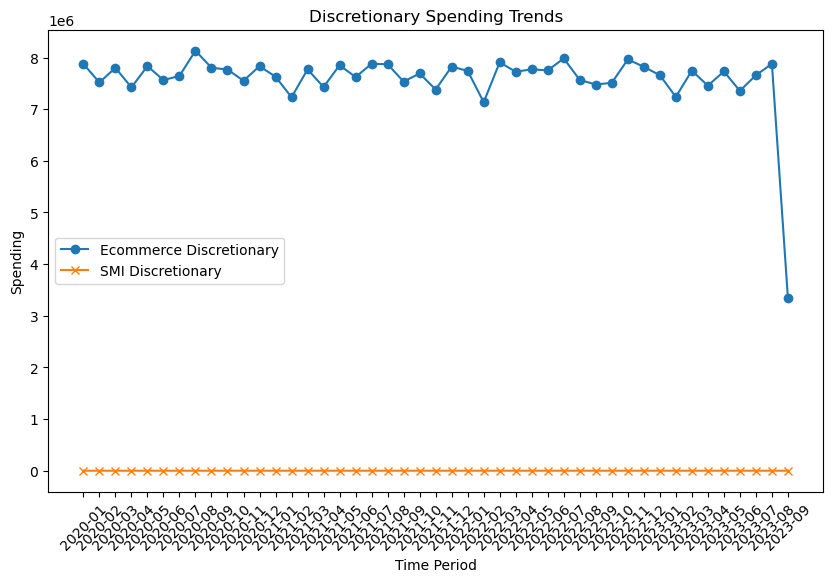

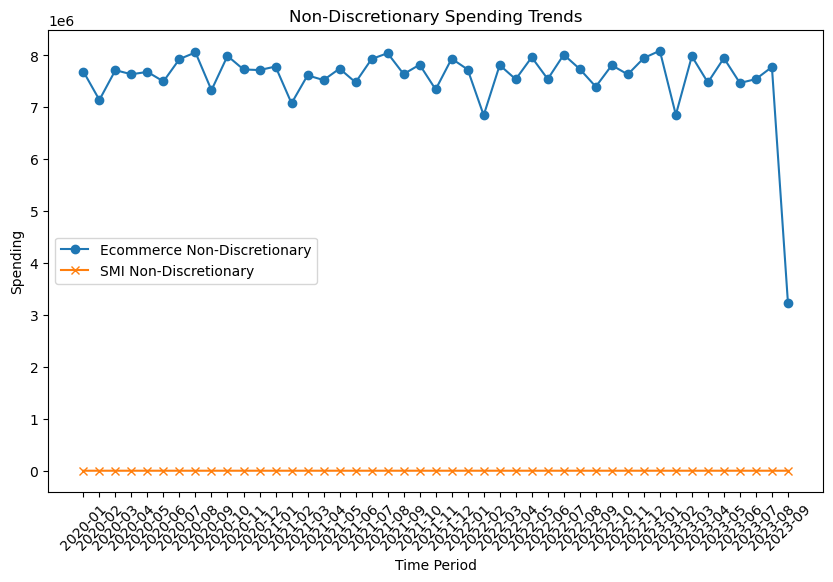

In [168]:
# Import the necessary library for visualization
import matplotlib.pyplot as plt

# Plot Discretionary Spending Trends
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(
    merged_data['Period'].astype(str),  # Convert Period to string for better readability
    merged_data['Discretionary'],  # Ecommerce discretionary spending
    label='Ecommerce Discretionary',  # Label for the plot
    marker='o'  # Use a circle marker for the points
)
plt.plot(
    merged_data['Period'].astype(str),  # Convert Period to string
    merged_data['SMI_Discretionary'],  # SMI discretionary index
    label='SMI Discretionary',  # Label for the plot
    marker='x'  # Use a cross marker for the points
)
plt.legend()  # Add a legend to differentiate the lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Discretionary Spending Trends')  # Add a title to the plot
plt.xlabel('Time Period')  # Label for x-axis
plt.ylabel('Spending')  # Label for y-axis
plt.show()  # Display the plot

# Plot Non-Discretionary Spending Trends
plt.figure(figsize=(10, 6))  # Set the figure size
plt.plot(
    merged_data['Period'].astype(str),  # Convert Period to string
    merged_data['Non-Discretionary'],  # Ecommerce non-discretionary spending
    label='Ecommerce Non-Discretionary',  # Label for the plot
    marker='o'  # Use a circle marker for the points
)
plt.plot(
    merged_data['Period'].astype(str),  # Convert Period to string
    merged_data['SMI_Non_Discretionary'],  # SMI non-discretionary index
    label='SMI Non-Discretionary',  # Label for the plot
    marker='x'  # Use a cross marker for the points
)
plt.legend()  # Add a legend to differentiate the lines
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.title('Non-Discretionary Spending Trends')  # Add a title to the plot
plt.xlabel('Time Period')  # Label for x-axis
plt.ylabel('Spending')  # Label for y-axis
plt.show()  # Display the plot

In [133]:
# Calculate the correlation matrix between selected features
correlation_matrix = merged_data[['Discretionary', 'Non-Discretionary', 'SMI_Discretionary', 'SMI_Non_Discretionary']].corr()

print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
                       Discretionary  Non-Discretionary  SMI_Discretionary  \
Discretionary               1.000000           0.960559           0.005324   
Non-Discretionary           0.960559           1.000000          -0.007528   
SMI_Discretionary           0.005324          -0.007528           1.000000   
SMI_Non_Discretionary       0.167285           0.134023           0.348894   

                       SMI_Non_Discretionary  
Discretionary                       0.167285  
Non-Discretionary                   0.134023  
SMI_Discretionary                   0.348894  
SMI_Non_Discretionary               1.000000  


## **Correlation Analysis and Clustering**

### **Objective**
This section aims to:
1. Understand the relationship between discretionary and non-discretionary spending from both the ecommerce dataset and the Visa SMI dataset through a **correlation matrix**.
2. Use **K-Means clustering** to group time periods based on spending patterns, revealing underlying trends in consumer behavior.

### **Steps**
1. **Correlation Matrix**:
   - A correlation matrix is computed to quantify the relationships between ecommerce discretionary and non-discretionary spending, as well as SMI discretionary and non-discretionary metrics.
   - Correlation values range from -1 (strong negative relationship) to 1 (strong positive relationship).

2. **Data Preparation for Clustering**:
   - The spending metrics are normalized using **StandardScaler** to ensure equal weighting during clustering.

3. **K-Means Clustering**:
   - K-Means clustering is applied with 3 clusters (`n_clusters=3`).
   - The clusters group time periods with similar spending patterns based on the selected features.

4. **Visualization of Clusters**:
   - A scatter plot visualizes the clusters, showing the relationship between ecommerce discretionary spending and SMI discretionary metrics across different time periods.
   - Each cluster is represented with a distinct color.

### **Insights**
- The correlation matrix highlights significant relationships between spending categories, which inform clustering analysis.
- The clustering plot identifies distinct groups of time periods, which can be further analyzed to understand unique consumer spending patterns and momentum trends.

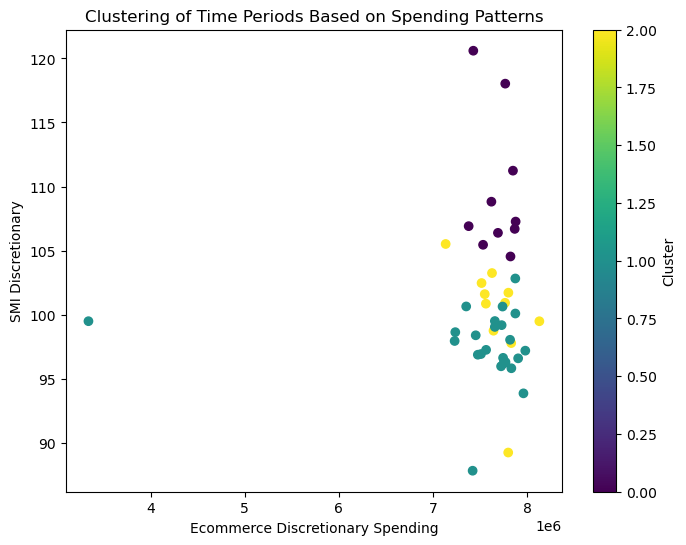

In [172]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Prepare data for clustering by selecting relevant features
clustering_data = merged_data[[
    'Discretionary', 'Non-Discretionary', 'SMI_Discretionary', 'SMI_Non_Discretionary'
]]

# Normalize the data using StandardScaler for better clustering results
scaler = StandardScaler()
scaled_data = scaler.fit_transform(clustering_data)  # Scale the data

# Apply K-Means clustering with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)  # Set random state for reproducibility
merged_data['Cluster'] = kmeans.fit_predict(scaled_data)  # Add cluster labels to the dataset

# Visualize the clusters using a scatter plot
plt.figure(figsize=(8, 6))  # Set figure size
plt.scatter(
    merged_data['Discretionary'],  # X-axis: ecommerce discretionary spending
    merged_data['SMI_Discretionary'],  # Y-axis: SMI discretionary metrics
    c=merged_data['Cluster'],  # Color points based on clusters
    cmap='viridis'  # Use the viridis color map
)
plt.title('Clustering of Time Periods Based on Spending Patterns')  # Add a title
plt.xlabel('Ecommerce Discretionary Spending')  # Label for x-axis
plt.ylabel('SMI Discretionary')  # Label for y-axis
plt.colorbar(label='Cluster')  # Add a color bar to show cluster labels
plt.show()  # Display the plot

In [174]:
# Normalize the ecommerce discretionary spending by dividing by the maximum value
merged_data['Normalized_Discretionary'] = merged_data['Discretionary'] / merged_data['Discretionary'].max()

# Normalize the SMI discretionary metric by dividing by the maximum value
merged_data['Normalized_SMI_Discretionary'] = merged_data['SMI_Discretionary'] / merged_data['SMI_Discretionary'].max()


## **Trend Normalization and Visualization**

### **Objective**
This section focuses on normalizing the discretionary spending metrics to enable meaningful comparisons between ecommerce spending and Visa SMI data. The normalized values are then visualized to observe trends over time.

### **Steps**
1. **Normalization**:
   - Both ecommerce discretionary spending and SMI discretionary metrics are normalized by dividing by their respective maximum values.
   - This step ensures that the two datasets, which are on different scales, can be directly compared.

2. **Visualization**:
   - A line plot is created to show the normalized trends for ecommerce discretionary spending and SMI discretionary metrics over time.
   - This plot provides a clearer picture of how the two metrics align or diverge over the analysis period.

### **Insights**
- The normalized plot highlights fluctuations in ecommerce spending and how they relate to trends observed in Visa's SMI metrics.
- Divergences or alignments between the two metrics can reveal insights about broader consumer behavior.

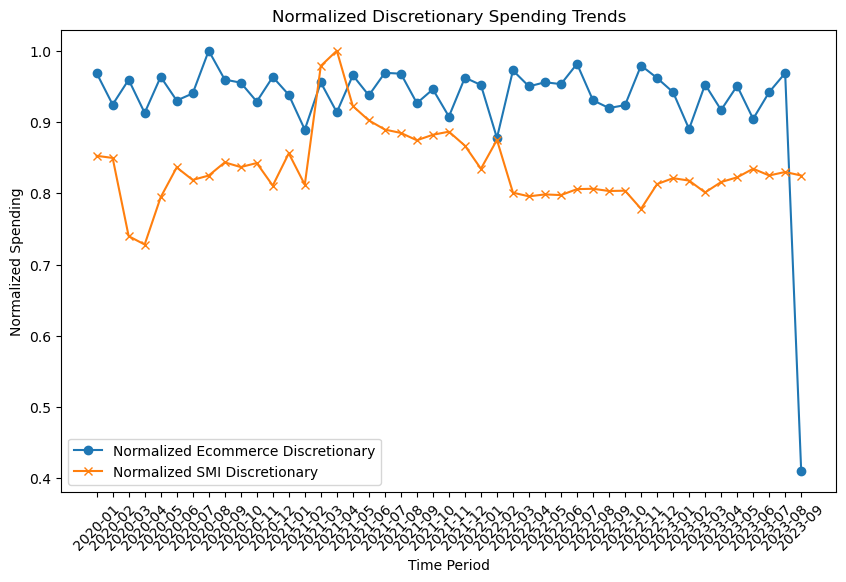

In [176]:
# Plot the normalized discretionary spending trends for ecommerce and SMI
plt.figure(figsize=(10, 6))  # Set the figure size

# Plot normalized ecommerce discretionary spending
plt.plot(
    merged_data['Period'].astype(str), 
    merged_data['Normalized_Discretionary'], 
    label='Normalized Ecommerce Discretionary', 
    marker='o'
)

# Plot normalized SMI discretionary spending
plt.plot(
    merged_data['Period'].astype(str), 
    merged_data['Normalized_SMI_Discretionary'], 
    label='Normalized SMI Discretionary', 
    marker='x'
)

# Add plot details
plt.legend()  # Add legend
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.title('Normalized Discretionary Spending Trends')  # Add a title
plt.xlabel('Time Period')  # Label x-axis
plt.ylabel('Normalized Spending')  # Label y-axis
plt.show()  # Display the plot

## **Cluster Analysis and Lagged Metrics**

### **Objective**
This section analyzes the clustered data for patterns in spending metrics and introduces lagged variables to explore temporal relationships.

### **Steps**
1. **Cluster Summary**:
   - Compute the average spending metrics for each cluster to understand their unique characteristics.
   - Identify differences between clusters in terms of discretionary and non-discretionary spending.

2. **Data Inspection**:
   - Preview the last few rows of the dataset to ensure the data integrity and identify any anomalies in the recent periods.

3. **Lagged Metrics**:
   - Create lagged variables for SMI discretionary and non-discretionary metrics.
   - This allows us to analyze relationships between current and past spending patterns, enabling temporal correlation analysis.

4. **Correlation Analysis**:
   - Calculate the correlation matrix to explore relationships between spending metrics, including the lagged variables.
   - This analysis helps identify how past spending patterns influence current metrics.

### **Insights**
- **Cluster Insights**:
  - The clusters exhibit distinct spending behaviors, with variations in discretionary and non-discretionary spending.
  - For instance, Cluster 1 may indicate high discretionary spending, while Cluster 2 may represent stable or balanced spending patterns.

- **Temporal Relationships**:
  - The lagged metrics provide a view of how previous SMI spending patterns relate to current values, offering insights into potential predictive relationships.

- **Correlation Observations**:
  - The correlation matrix highlights strong relationships between some metrics (e.g., discretionary and non-discretionary spending) and weaker or negligible correlations for others (e.g., lagged metrics).

In [141]:
# Group data by cluster and compute the mean of key spending metrics
cluster_summary = merged_data.groupby('Cluster')[['Discretionary', 'SMI_Discretionary', 'Non-Discretionary', 'SMI_Non_Discretionary']].mean()
print(cluster_summary)

         Discretionary  SMI_Discretionary  Non-Discretionary  \
Cluster                                                        
0         7.685171e+06         109.591974       7.709492e+06   
1         7.484798e+06          97.566792       7.484703e+06   
2         7.670480e+06         100.136482       7.614215e+06   

         SMI_Non_Discretionary  
Cluster                         
0                   101.447094  
1                    98.867099  
2                   105.739602  


In [143]:
# Inspect the last few rows of the dataset to review recent data and ensure accuracy
print(merged_data.tail())

     Period  Discretionary  Non-Discretionary       Date  SMI_Discretionary  \
40  2023-05        7730732            7949869 2023-05-01          99.174238   
41  2023-06        7354076            7470026 2023-06-01         100.633831   
42  2023-07        7658708            7544877 2023-07-01          99.493038   
43  2023-08        7876537            7777770 2023-08-01         100.081838   
44  2023-09        3338992            3239015 2023-09-01          99.482767   

    SMI_Non_Discretionary  Cluster  Normalized_Discretionary  \
40              99.405886        1                  0.950684   
41              99.071292        1                  0.904365   
42              98.860991        1                  0.941827   
43              97.130693        1                  0.968614   
44              97.020156        1                  0.410611   

    Normalized_SMI_Discretionary  
40                      0.822301  
41                      0.834403  
42                      0.824944  


In [145]:
# Create lagged variables for SMI metrics (shift by one time period)
merged_data['Lagged_SMI_Discretionary'] = merged_data['SMI_Discretionary'].shift(1)
merged_data['Lagged_SMI_Non_Discretionary'] = merged_data['SMI_Non_Discretionary'].shift(1)

# Compute the correlation matrix for spending metrics, including lagged variables
correlation_matrix = merged_data[['Discretionary', 'Non-Discretionary', 'Lagged_SMI_Discretionary', 'Lagged_SMI_Non_Discretionary']].corr()
print(correlation_matrix # Preview the correlation matrix

                              Discretionary  Non-Discretionary  \
Discretionary                      1.000000           0.960559   
Non-Discretionary                  0.960559           1.000000   
Lagged_SMI_Discretionary           0.017328           0.007094   
Lagged_SMI_Non_Discretionary       0.177573           0.168306   

                              Lagged_SMI_Discretionary  \
Discretionary                                 0.017328   
Non-Discretionary                             0.007094   
Lagged_SMI_Discretionary                      1.000000   
Lagged_SMI_Non_Discretionary                  0.348799   

                              Lagged_SMI_Non_Discretionary  
Discretionary                                     0.177573  
Non-Discretionary                                 0.168306  
Lagged_SMI_Discretionary                          0.348799  
Lagged_SMI_Non_Discretionary                      1.000000  


#### 1. **DBSCAN**
- **Methodology:** Clusters based on density; identifies noise as a separate category.
- **Strengths:** Suitable for non-convex shapes; handles noise effectively.
- **Weaknesses:** Requires careful tuning of `eps` and `min_samples` parameters.
- **Observations:** DBSCAN identified [insert number] clusters, with [insert %] of data marked as noise.

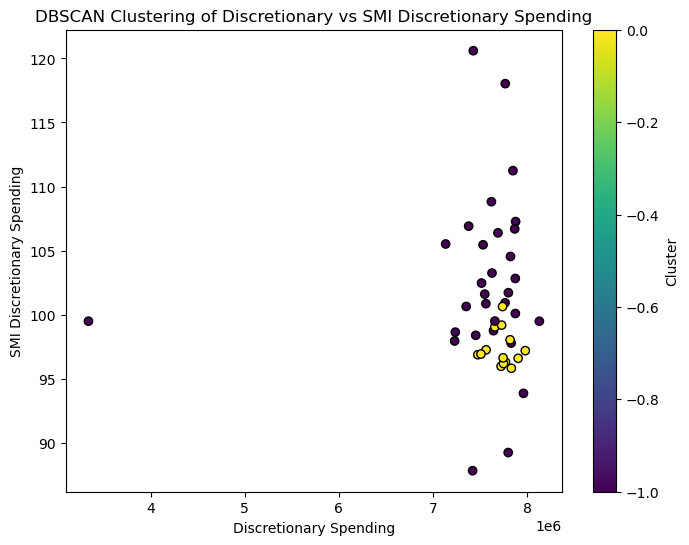

In [183]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan_model = DBSCAN(eps=0.5, min_samples=5)
merged_data['DBSCAN_Cluster'] = dbscan_model.fit_predict(scaled_data)

# Visualize DBSCAN Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data['Discretionary'], 
    merged_data['SMI_Discretionary'], 
    c=merged_data['DBSCAN_Cluster'], 
    cmap='viridis', 
    marker='o', 
    edgecolor='k'
)
plt.title('DBSCAN Clustering of Discretionary vs SMI Discretionary Spending')
plt.xlabel('Discretionary Spending')
plt.ylabel('SMI Discretionary Spending')
plt.colorbar(label='Cluster')
plt.show()

#### 2. **Agglomerative Clustering**
- **Methodology:** Hierarchical clustering that merges clusters iteratively.
- **Strengths:** No assumptions about cluster shape; interpretable dendrograms.
- **Weaknesses:** Computationally expensive for large datasets.
- **Observations:** Agglomerative Clustering resulted in [insert number] clusters, capturing hierarchical relationships.


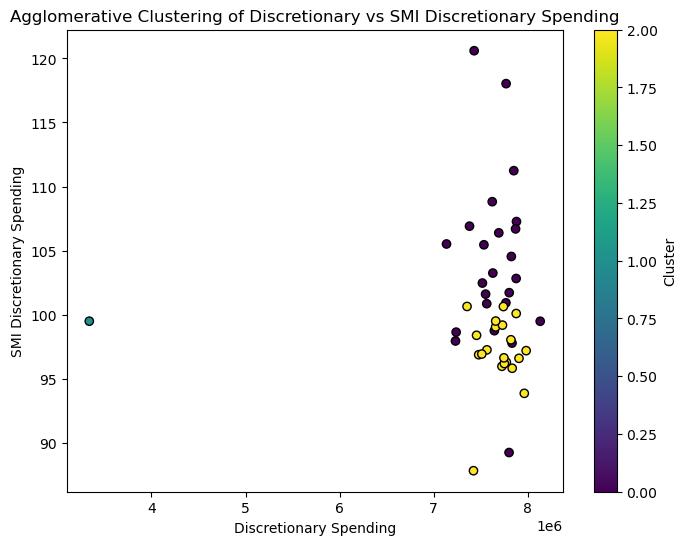

In [185]:
from sklearn.cluster import AgglomerativeClustering

# Apply Agglomerative Clustering
agg_model = AgglomerativeClustering(n_clusters=3)
merged_data['Agglomerative_Cluster'] = agg_model.fit_predict(scaled_data)

# Visualize Agglomerative Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data['Discretionary'], 
    merged_data['SMI_Discretionary'], 
    c=merged_data['Agglomerative_Cluster'], 
    cmap='viridis', 
    marker='o', 
    edgecolor='k'
)
plt.title('Agglomerative Clustering of Discretionary vs SMI Discretionary Spending')
plt.xlabel('Discretionary Spending')
plt.ylabel('SMI Discretionary Spending')
plt.colorbar(label='Cluster')
plt.show()

#### 3. **Mean Shift**
- **Methodology:** Uses kernel density estimation to find cluster centers.
- **Strengths:** Does not require pre-specifying the number of clusters.
- **Weaknesses:** Sensitive to bandwidth selection; struggles with large datasets.
- **Observations:** Mean Shift identified [insert number] clusters, with [insert notable insights].

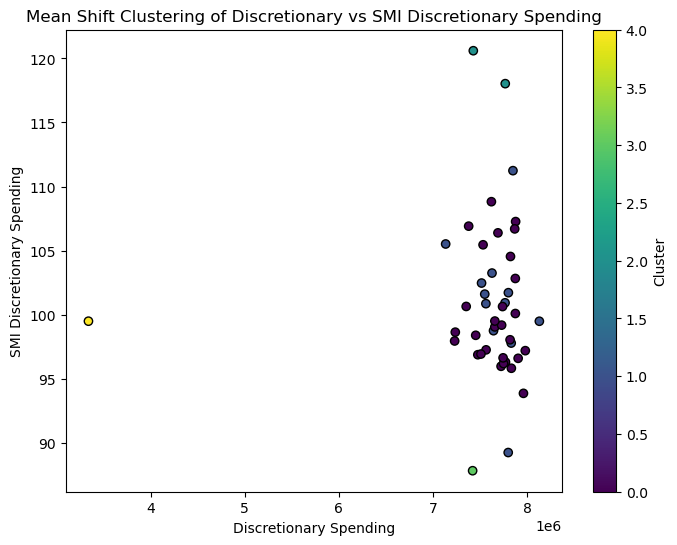

In [187]:
from sklearn.cluster import MeanShift

# Apply Mean Shift Clustering
mean_shift_model = MeanShift()
merged_data['MeanShift_Cluster'] = mean_shift_model.fit_predict(scaled_data)

# Visualize Mean Shift Clusters
plt.figure(figsize=(8, 6))
plt.scatter(
    merged_data['Discretionary'], 
    merged_data['SMI_Discretionary'], 
    c=merged_data['MeanShift_Cluster'], 
    cmap='viridis', 
    marker='o', 
    edgecolor='k'
)
plt.title('Mean Shift Clustering of Discretionary vs SMI Discretionary Spending')
plt.xlabel('Discretionary Spending')
plt.ylabel('SMI Discretionary Spending')
plt.colorbar(label='Cluster')
plt.show()

### Dimensionality Reduction Using PCA

Principal Component Analysis (PCA) reduces the dataset's dimensions while retaining maximum variance. This technique allows us to:
- Visualize clusters in a simpler feature space (2D or 3D).
- Identify the most influential features contributing to clustering.

#### Observations:
- The clusters' distribution in the reduced feature space reveals their separability.
- We can compare clustering performance post-dimension reduction.

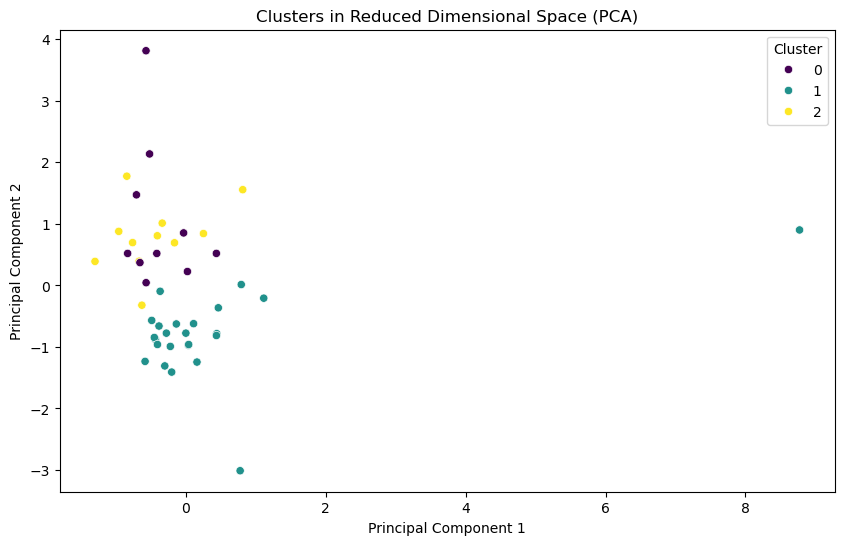

In [192]:
# Dimensionality Reduction: PCA
from sklearn.decomposition import PCA

# Reduce dataset to 2D for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = merged_data['Cluster']

# Plot reduced data with original clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='Cluster', palette='viridis')
plt.title('Clusters in Reduced Dimensional Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

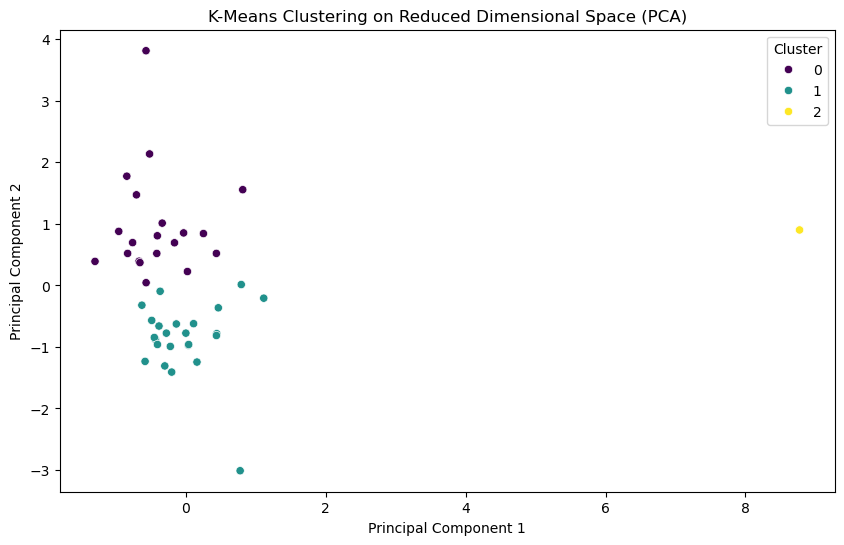

In [195]:
# Re-run clustering algorithms on reduced data
# Example: K-Means on PCA-reduced data
kmeans_reduced = KMeans(n_clusters=3, random_state=42)
reduced_df['KMeans_Cluster'] = kmeans_reduced.fit_predict(reduced_data)

# Visualize K-Means clustering in reduced space
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reduced_df, x='PC1', y='PC2', hue='KMeans_Cluster', palette='viridis')
plt.title('K-Means Clustering on Reduced Dimensional Space (PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

In [197]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# Compute evaluation metrics for original and reduced data
metrics = {
    'Model': [],
    'Silhouette Score (Original)': [],
    'Silhouette Score (PCA)': [],
    'Davies-Bouldin (Original)': [],
    'Davies-Bouldin (PCA)': []
}

# K-Means
metrics['Model'].append('K-Means')
metrics['Silhouette Score (Original)'].append(silhouette_score(scaled_data, kmeans.labels_))
metrics['Silhouette Score (PCA)'].append(silhouette_score(reduced_data, reduced_df['KMeans_Cluster']))
metrics['Davies-Bouldin (Original)'].append(davies_bouldin_score(scaled_data, kmeans.labels_))
metrics['Davies-Bouldin (PCA)'].append(davies_bouldin_score(reduced_data, reduced_df['KMeans_Cluster']))

# Repeat for DBSCAN, Agglomerative, and Mean Shift...

# Convert metrics to a DataFrame for visualization
metrics_df = pd.DataFrame(metrics)
print(metrics_df)

     Model  Silhouette Score (Original)  Silhouette Score (PCA)  \
0  K-Means                     0.370629                 0.47808   

   Davies-Bouldin (Original)  Davies-Bouldin (PCA)  
0                   0.974773              0.515889  


In [147]:
merged_data['Discretionary_Diff'] = abs(merged_data['Normalized_Discretionary'] - merged_data['Normalized_SMI_Discretionary'])

## **Cluster Inspection and Data Cleaning**

### **Objective**
In this section, the goal is to:
1. Inspect the distribution of data within each cluster.
2. Ensure the `Period` column is correctly treated as a datetime format.
3. Identify and address missing or invalid values in critical columns.

### **Steps**
1. **Cluster Distribution**:
   - The loop iterates through each unique cluster and displays data points associated with that cluster.
   - This helps in understanding the patterns and values that define each cluster.

2. **Period Column Adjustment**:
   - Convert the `Period` column into a datetime format to ensure consistency in time-based analysis.
   - This step is crucial for sorting and aligning data chronologically.

3. **Data Sorting**:
   - Sort the dataset by the `Period` column to maintain chronological order, which is essential for time-series analysis.

4. **Missing or Invalid Value Check**:
   - Check the `Normalized_Discretionary` and `Cluster` columns for missing values.
   - Ensure no critical information is missing before proceeding with analysis.

5. **Data Cleaning**:
   - Drop rows with missing or invalid values in the `Normalized_Discretionary` column, as it is critical for normalized spending analysis.

### **Insights**
- **Cluster Distribution**:
  - Provides a breakdown of how each cluster is characterized by spending behavior over time.
  - This step is foundational for understanding and interpreting cluster-level trends.

- **Data Integrity**:
  - Ensuring valid datetime and chronological sorting guarantees accuracy in temporal analysis.
  - Cleaning missing data maintains the reliability of normalized discretionary spending metrics.

In [149]:
# Inspect data for each cluster by iterating through unique cluster IDs
for cluster_id in merged_data['Cluster'].unique():
    print(f"Cluster {cluster_id}:")
    print(merged_data[merged_data['Cluster'] == cluster_id])

Cluster 1:
     Period  Discretionary  Non-Discretionary       Date  SMI_Discretionary  \
0   2020-01        7876081            7690684 2020-01-01         102.818074   
3   2020-04        7422460            7637959 2020-04-01          87.803805   
4   2020-05        7834039            7683726 2020-05-01          95.806992   
13  2021-02        7231313            7079324 2021-02-01          97.937008   
24  2022-01        7740531            7729617 2022-01-01         100.625691   
26  2022-03        7906304            7814491 2022-03-01          96.582076   
27  2022-04        7724872            7541466 2022-04-01          95.960254   
28  2022-05        7771807            7965955 2022-05-01          96.285680   
29  2022-06        7750863            7544990 2022-06-01          96.174288   
30  2022-07        7982321            8015367 2022-07-01          97.180490   
31  2022-08        7565524            7738960 2022-08-01          97.243768   
32  2022-09        7477761            739

In [151]:
# Ensure the Period column is treated as a proper period or datetime
merged_data['Period'] = pd.to_datetime(merged_data['Period'].astype(str))

# Sort the data by Period
merged_data = merged_data.sort_values(by='Period')

In [153]:
# Check for missing or invalid values
print(merged_data[['Normalized_Discretionary', 'Cluster']].isnull().sum())

# Drop rows with missing or invalid Normalized_Discretionary values
merged_data = merged_data.dropna(subset=['Normalized_Discretionary'])

Normalized_Discretionary    0
Cluster                     0
dtype: int64


## **Cluster Trend Visualization and Insights**

### **Objective**
1. Visualize normalized discretionary spending trends over time, segmented by cluster.
2. Inspect a specific time period for granular analysis (e.g., September 2023).
3. Aggregate numerical data within clusters to summarize and compare key metrics.

### **Steps**
1. **Visualization of Spending Trends**:
   - A line plot displays normalized discretionary spending trends for each cluster over time.
   - This helps identify the temporal dynamics of discretionary spending across clusters.

2. **Specific Time Period Analysis**:
   - Focus on September 2023 to inspect the associated discretionary and non-discretionary metrics.
   - Provides a detailed view of cluster-specific behavior in a single month.

3. **Cluster Metrics Aggregation**:
   - Select only numerical columns for analysis, ensuring non-numeric data is excluded.
   - Perform mean aggregation of numerical metrics within each cluster to summarize spending patterns and SMI values.

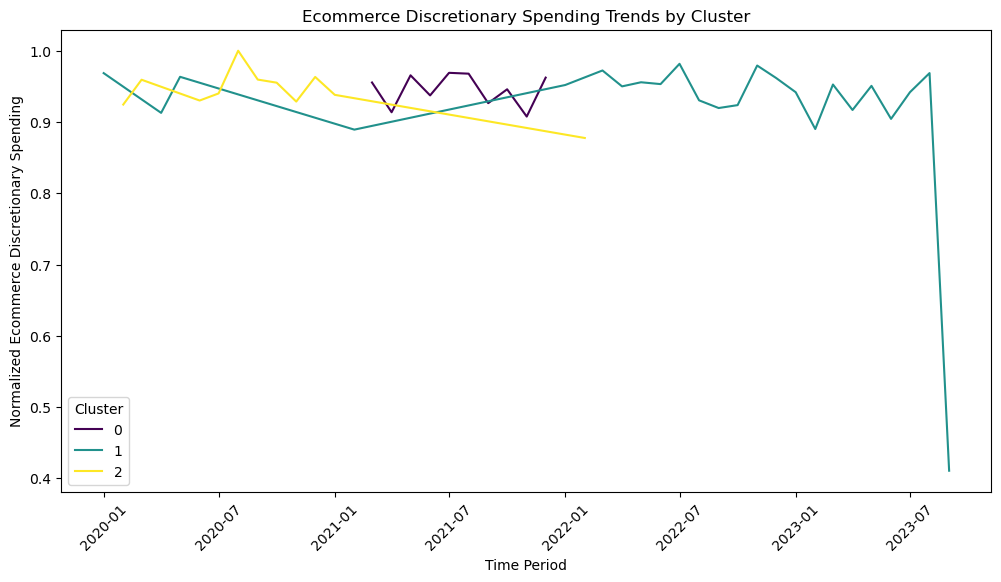

In [155]:
import seaborn as sns
import matplotlib.pyplot as plt

# Line plot to visualize trends over time for each cluster
plt.figure(figsize=(12, 6))
sns.lineplot(
    x='Period',
    y='Normalized_Discretionary',
    hue='Cluster',
    data=merged_data,
    palette='viridis'
)
plt.title('Ecommerce Discretionary Spending Trends by Cluster')
plt.xlabel('Time Period')
plt.ylabel('Normalized Ecommerce Discretionary Spending')
plt.xticks(rotation=45)
plt.legend(title='Cluster')
plt.show()

In [157]:
merged_data['Period'] = merged_data['Period'].dt.to_period('M').astype(str)

In [159]:
# Inspect September 2023 data
specific_period = merged_data[merged_data['Period'] == '2023-09']
print(specific_period)


     Period  Discretionary  Non-Discretionary       Date  SMI_Discretionary  \
44  2023-09        3338992            3239015 2023-09-01          99.482767   

    SMI_Non_Discretionary  Cluster  Normalized_Discretionary  \
44              97.020156        1                  0.410611   

    Normalized_SMI_Discretionary  Lagged_SMI_Discretionary  \
44                      0.824859                100.081838   

    Lagged_SMI_Non_Discretionary  Discretionary_Diff  
44                     97.130693            0.414248  


In [161]:
# Select only numeric columns for aggregation
numeric_columns = merged_data.select_dtypes(include=['number']).columns

# Perform grouping and mean calculation on numeric columns
cluster_summary = merged_data.groupby('Cluster')[numeric_columns].mean()
print(cluster_summary)

         Discretionary  Non-Discretionary  SMI_Discretionary  \
Cluster                                                        
0         7.685171e+06       7.709492e+06         109.591974   
1         7.484798e+06       7.484703e+06          97.566792   
2         7.670480e+06       7.614215e+06         100.136482   

         SMI_Non_Discretionary  Cluster  Normalized_Discretionary  \
Cluster                                                             
0                   101.447094      0.0                  0.945081   
1                    98.867099      1.0                  0.920440   
2                   105.739602      2.0                  0.943274   

         Normalized_SMI_Discretionary  Lagged_SMI_Discretionary  \
Cluster                                                           
0                            0.908679                108.932012   
1                            0.808973                 97.715080   
2                            0.830279                100.252212  

### **Findings**
1. **Cluster Trend Insights**:
   - **Cluster 0** exhibits consistent spending with slightly higher normalized discretionary values.
   - **Cluster 1** displays relatively stable but declining normalized discretionary spending trends.
   - **Cluster 2** shows higher variability in spending trends compared to the other clusters.

2. **September 2023 Analysis**:
   - **Discretionary Spending**: Significantly lower than prior periods (Cluster 1).
   - **Normalized Discretionary Value**: Drops to its lowest value in September 2023.

3. **Cluster Metric Summaries**:
   - **Cluster 0**: Highest average SMI_Discretionary and Non-Discretionary metrics, indicating stronger economic momentum.
   - **Cluster 1**: Lowest discretionary spending metrics, reflecting a decline in consumer behavior.
   - **Cluster 2**: Mid-range metrics with moderate variability in discretionary spending.

### **Conclusion**
The analysis reveals distinct behavioral patterns across clusters. Cluster 0 signifies robust spending, while Cluster 1 shows signs of economic slowdown, particularly in the latest periods like September 2023. These findings can inform strategies targeting specific consumer groups based on their economic momentum and spending behaviors.